In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [4]:
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report


In [6]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 7, 4

In [7]:
iris = datasets.load_iris()

In [38]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names

In [12]:
X[1:10,]

array([[-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [13]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


clustering

In [16]:
clustering = KMeans(n_clusters=3, random_state=5, verbose=1)
clustering.fit(X)

Initialization complete
Iteration 0, inertia 230.25454457829463
Iteration 1, inertia 140.34410664388813
Iteration 2, inertia 139.82049635974974
Converged at iteration 2: center shift 0.0 within tolerance 9.999999999999998e-05
Initialization complete
Iteration 0, inertia 207.27582526280227
Iteration 1, inertia 140.92504333761178
Iteration 2, inertia 140.36037767659772
Iteration 3, inertia 140.08951698482215
Iteration 4, inertia 140.03275277428654
Converged at iteration 4: center shift 0.0 within tolerance 9.999999999999998e-05
Initialization complete
Iteration 0, inertia 212.15262686992838
Iteration 1, inertia 145.4803556325956
Iteration 2, inertia 141.2171900120554
Iteration 3, inertia 140.36037767659772
Iteration 4, inertia 140.08951698482215
Iteration 5, inertia 140.03275277428654
Converged at iteration 5: center shift 0.0 within tolerance 9.999999999999998e-05
Initialization complete
Iteration 0, inertia 180.85182237568642
Iteration 1, inertia 141.137404189285
Iteration 2, inertia 1

KMeans(n_clusters=3, random_state=5, verbose=1)

In [18]:
clustering.fit(X)

Initialization complete
Iteration 0, inertia 230.25454457829463
Iteration 1, inertia 140.34410664388813
Iteration 2, inertia 139.82049635974974
Converged at iteration 2: center shift 0.0 within tolerance 9.999999999999998e-05
Initialization complete
Iteration 0, inertia 207.27582526280227
Iteration 1, inertia 140.92504333761178
Iteration 2, inertia 140.36037767659772
Iteration 3, inertia 140.08951698482215
Iteration 4, inertia 140.03275277428654
Converged at iteration 4: center shift 0.0 within tolerance 9.999999999999998e-05
Initialization complete
Iteration 0, inertia 212.15262686992838
Iteration 1, inertia 145.4803556325956
Iteration 2, inertia 141.2171900120554
Iteration 3, inertia 140.36037767659772
Iteration 4, inertia 140.08951698482215
Iteration 5, inertia 140.03275277428654
Converged at iteration 5: center shift 0.0 within tolerance 9.999999999999998e-05
Initialization complete
Iteration 0, inertia 180.85182237568642
Iteration 1, inertia 141.137404189285
Iteration 2, inertia 1

KMeans(n_clusters=3, random_state=5, verbose=1)

In [21]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = variable_names
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
y.columns = ["Targets"]

In [24]:
color_theme = np.array(['darkgray','lightsalmon','powderblue'])

Text(0.5, 1.0, 'K Means classification')

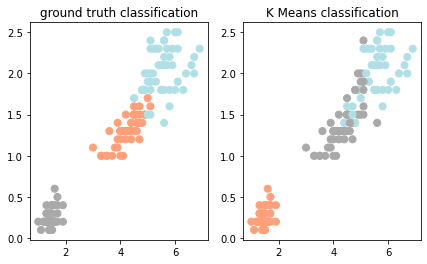

In [30]:
plt.subplot(1,2,1)
plt.scatter(x=iris_df["petal length (cm)"], y=iris_df["petal width (cm)"], c=color_theme[iris.target], s=50)
plt.title('ground truth classification')
plt.subplot(1,2,2)
plt.scatter(x=iris_df["petal length (cm)"], y=iris_df["petal width (cm)"], c=color_theme[clustering.labels_], s=50)
plt.title("K Means classification")

Text(0.5, 1.0, 'K Means classification')

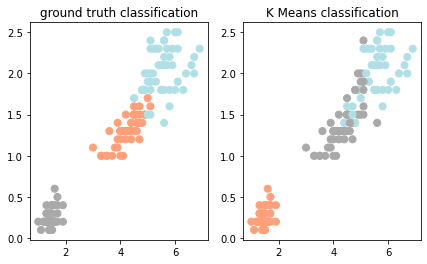

In [36]:
relabel = np.choose(clustering.labels_,[1,0,2]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=iris_df["petal length (cm)"], y=iris_df["petal width (cm)"], c=color_theme[iris.target], s=50)
plt.title('ground truth classification')
plt.subplot(1,2,2)
plt.scatter(x=iris_df["petal length (cm)"], y=iris_df["petal width (cm)"], c=color_theme[clustering.labels_], s=50)
plt.title("K Means classification")

In [37]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

